# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
dtype_df=app_train.dtypes.reset_index()
dtype_df.columns = ["count", "column type"]
dtype_df.head()

,count,column type
0,SK_ID_CURR,int64
1,TARGET,int64
2,NAME_CONTRACT_TYPE,object
3,CODE_GENDER,object
4,FLAG_OWN_CAR,object


In [5]:
dtype_sum_df=dtype_df.groupby('column type').aggregate('count').reset_index()
dtype_sum_df

,column type,count
0,int64,41
1,float64,65
2,object,16


In [6]:
features_num=[]
for c,t in zip(dtype_df['count'],dtype_df['column type']):
    if t=='int64' or t=='float64':
        features_num.append(c)
len(features_num)

106

In [7]:
print(f'資料的數值型屬性的平均值是：\n{app_train[features_num].mean()}')

資料的數值型屬性的平均值是：
SK_ID_CURR                     278180.518577
TARGET                              0.080729
CNT_CHILDREN                        0.417052
AMT_INCOME_TOTAL               168797.919297
AMT_CREDIT                     599025.999706
AMT_ANNUITY                     27108.573909
AMT_GOODS_PRICE                538396.207429
REGION_POPULATION_RELATIVE          0.020868
DAYS_BIRTH                     -16036.995067
DAYS_EMPLOYED                   63815.045904
DAYS_REGISTRATION               -4986.120328
DAYS_ID_PUBLISH                 -2994.202373
OWN_CAR_AGE                        12.061091
FLAG_MOBIL                          0.999997
FLAG_EMP_PHONE                      0.819889
FLAG_WORK_PHONE                     0.199368
FLAG_CONT_MOBILE                    0.998133
FLAG_PHONE                          0.281066
FLAG_EMAIL                          0.056720
CNT_FAM_MEMBERS                     2.152665
REGION_RATING_CLIENT                2.052463
REGION_RATING_CLIENT_W_CITY         2.03

In [8]:
print(f'資料的數值型屬性的標準差是：\n{app_train[features_num].std()}')

資料的數值型屬性的標準差是：
SK_ID_CURR                     102790.175348
TARGET                              0.272419
CNT_CHILDREN                        0.722121
AMT_INCOME_TOTAL               237123.146279
AMT_CREDIT                     402490.776996
AMT_ANNUITY                     14493.737315
AMT_GOODS_PRICE                369446.460540
REGION_POPULATION_RELATIVE          0.013831
DAYS_BIRTH                       4363.988632
DAYS_EMPLOYED                  141275.766519
DAYS_REGISTRATION                3522.886321
DAYS_ID_PUBLISH                  1509.450419
OWN_CAR_AGE                        11.944812
FLAG_MOBIL                          0.001803
FLAG_EMP_PHONE                      0.384280
FLAG_WORK_PHONE                     0.399526
FLAG_CONT_MOBILE                    0.043164
FLAG_PHONE                          0.449521
FLAG_EMAIL                          0.231307
CNT_FAM_MEMBERS                     0.910682
REGION_RATING_CLIENT                0.509034
REGION_RATING_CLIENT_W_CITY         0.50

In [9]:
print(f'資料的數值型屬性的統計量是：\n{app_train[features_num].describe()}')

資料的數值型屬性的統計量是：
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%   

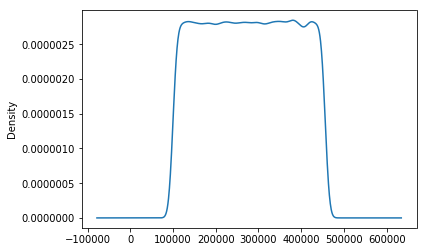

In [10]:
app_train['SK_ID_CURR'].plot(kind='kde')

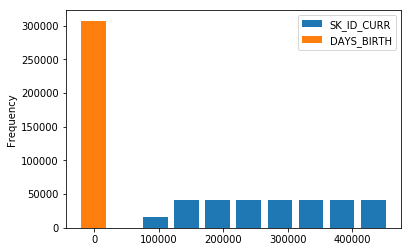

In [11]:
app_train[['SK_ID_CURR','DAYS_BIRTH']].plot(kind='hist',rwidth=0.8)

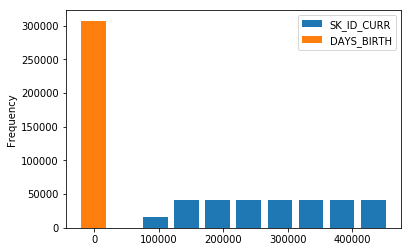

In [12]:
app_train[['SK_ID_CURR','DAYS_BIRTH']].plot.hist(rwidth=0.8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CA01070898>,
      dtype=object)

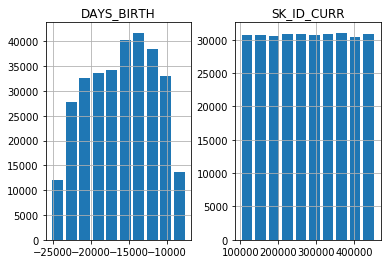

In [13]:
app_train[['SK_ID_CURR','DAYS_BIRTH']].hist(rwidth=0.8)

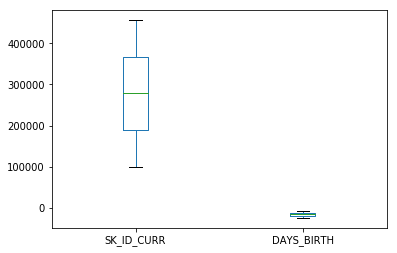

In [14]:
app_train[['SK_ID_CURR','DAYS_BIRTH']].plot.box()